In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_score, cross_val_predict,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, plot_confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc,roc_auc_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"/Users/nileshpatel/Downloads/train_u6lujuX_CVtuZ9i.csv.xls")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Checking the Value counts of null value columns

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Replacing the Null Values

In [14]:
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(360,inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label encoding for categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
for i in df.columns:
    if(df[i].dtypes == 'object') and (i != 'Loan_ID'):
        df[i] = le.fit_transform(df[i])

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# EDA

<AxesSubplot:>

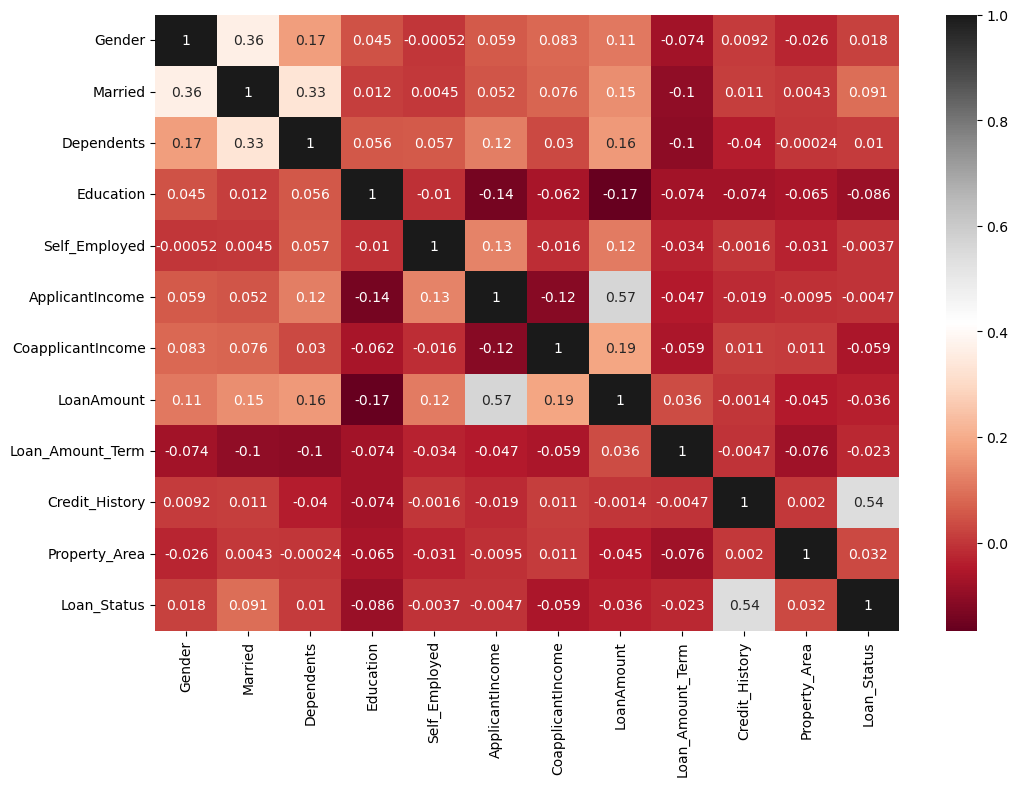

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdGy')

# Checking the outliers

<AxesSubplot:>

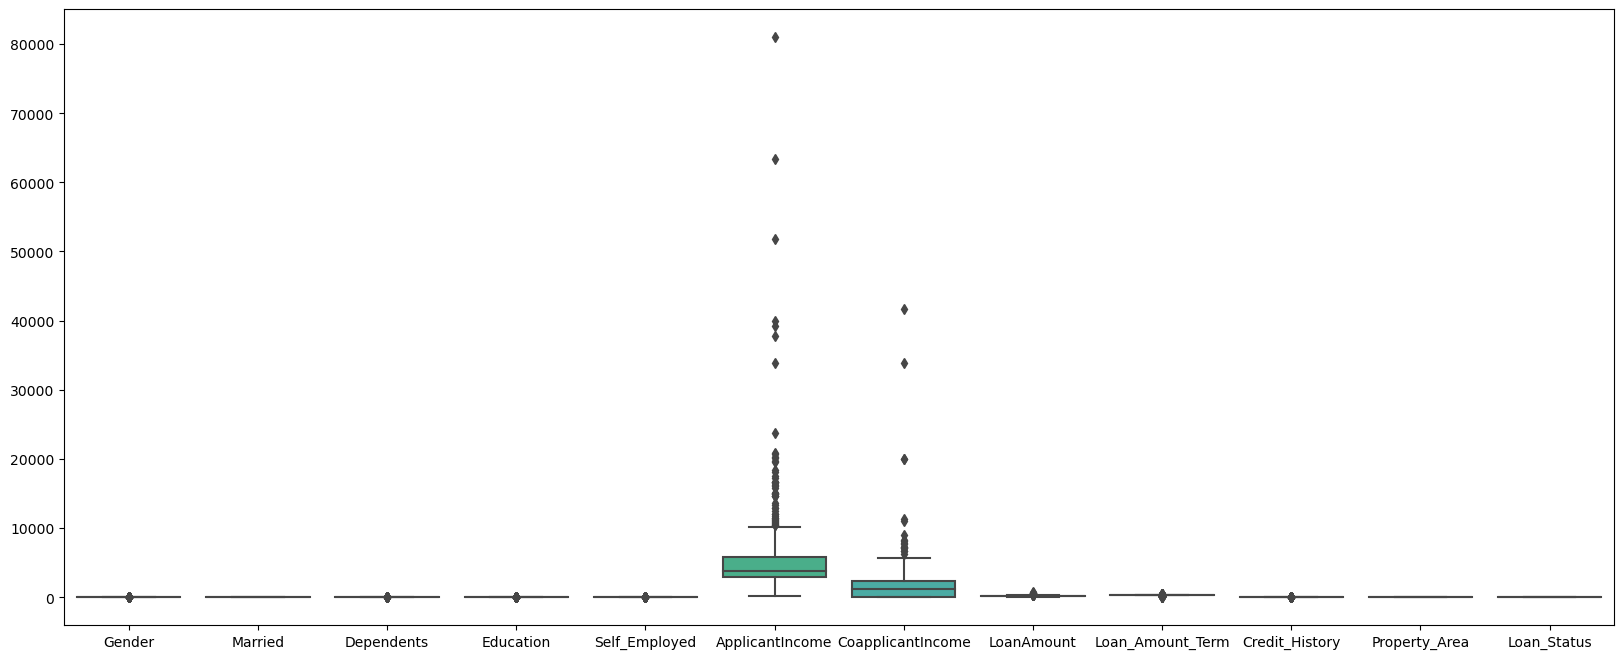

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

Detecting and Replacing Outliers

In [22]:
def detect_outliers(df,cols):
    for x in cols:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
        
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

In [27]:
outliers_drop = detect_outliers(df,['ApplicantIncome','CoapplicantIncome'])

In [28]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,564.000000,596.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4124.723404,1289.12906,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1926.989806,1461.72508,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2744.000000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3638.500000,1031.00000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5010.500000,2173.00000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.00000,700.000000,480.000000,1.000000,2.000000,1.000000


In [30]:
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(),inplace=True)

In [31]:
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(),inplace=True)

In [32]:
df['ApplicantIncome'].value_counts()

4124.723404    50
2500.000000     9
4583.000000     6
6000.000000     6
2600.000000     6
               ..
3850.000000     1
7787.000000     1
3430.000000     1
3975.000000     1
7583.000000     1
Name: ApplicantIncome, Length: 458, dtype: int64

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting Data for training & testing

In [34]:
x = df.drop(columns=['Loan_Status','Loan_ID'],axis=True)
y = df.Loan_Status                

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.30, random_state = 101)

# Standard Scaling

In [36]:
scaler = StandardScaler()

In [37]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [41]:
print(lr.score(x_train_scaled,y_train))
print(lr.score(x_test_scaled,y_test))

0.8181818181818182
0.7783783783783784


In [42]:
y_pred = lr.predict(x_test_scaled)

In [43]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [44]:
accuracy_score(y_test,y_pred)

0.7783783783783784

In [54]:
confusion_matrix(y_test,y_pred)

array([[ 26,  38],
       [  3, 118]])

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


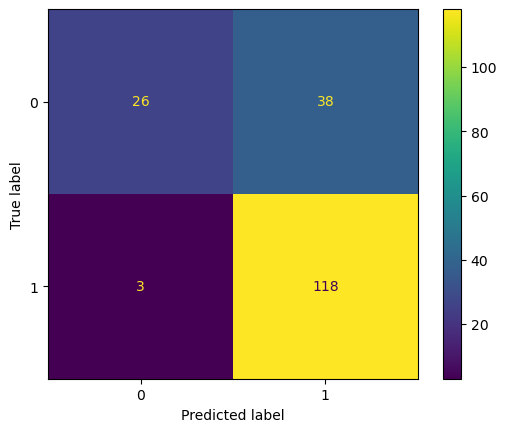

In [55]:
plot_confusion_matrix(lr,x_test_scaled,y_test)

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


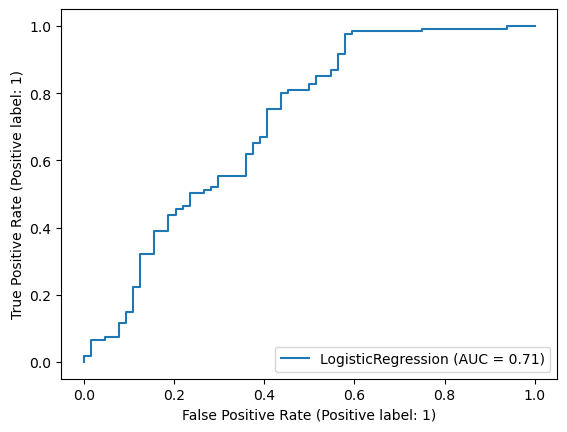

In [56]:
plot_roc_curve(lr,x_test_scaled,y_test)

Model making

In [57]:
import pickle

In [58]:
pickle.dump(lr,open('Loan_Prediction_lr.pickle','wb'))

In [59]:
model = pickle.load(open('Loan_Prediction_lr.pickle','rb'))

In [60]:
model

LogisticRegression()

# Random Forest

In [46]:
rf = RandomForestClassifier()

In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
rf.score(x_train,y_train)

1.0

In [49]:
rf.score(x_test,y_test)

0.7513513513513513

# Decision Tree

In [50]:
DT =DecisionTreeClassifier()

In [51]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
DT.score(x_train,y_train)

1.0

In [53]:
DT.score(x_test,y_test)

0.654054054054054